## **1. Preparação**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]

def relatorio_triagem(caminho, nome, alvo):
    print(f"📊 ANALISANDO: {nome.upper()}")
    try:
        df = pd.read_csv(caminho)
        print(f"• Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
        
        # Verificar Nulos
        nulos = df.isnull().sum()
        nulos = nulos[nulos > 0]
        if not nulos.empty:
            print(f"⚠️  ATENÇÃO: {len(nulos)} colunas com valores vazios!")
            print(nulos[nulos > 0])
        else:
            print("✅  Dados Limpos: Zero valores nulos.")
            
        # Verificar Alvo (Target)
        if alvo in df.columns:
            print(f"• Alvo '{alvo}': {df[alvo].dtype}")
            plt.figure(figsize=(6, 3))
            sns.countplot(x=df[alvo], palette='viridis')
            plt.title(f"Balanceamento do Alvo: {alvo}")
            plt.show()
        else:
            print(f"❌  ERRO: Coluna alvo '{alvo}' não encontrada. Colunas disponíveis: {list(df.columns)}")
            
    except Exception as e:
        print(f"❌  Erro ao ler arquivo: {e}")
    print("-" * 60)

## **2. Análise do Eixo A (Saúde)**

📊 ANALISANDO: DOENÇA CARDÍACA
• Dimensões: 297 linhas x 14 colunas
✅  Dados Limpos: Zero valores nulos.
• Alvo 'condition': int64


/tmp/ipykernel_469625/4171773002.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[alvo], palette='viridis')


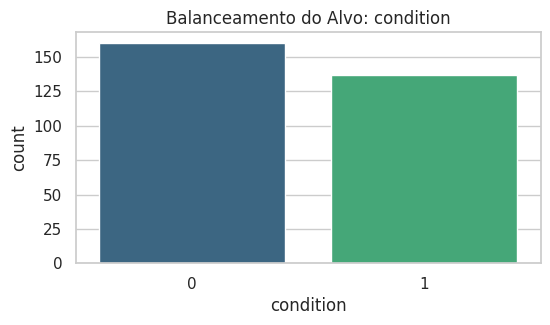

------------------------------------------------------------


In [3]:
# 1. Heart Disease (Classificação Binária - Clássico)
caminho_heart = 'data/heart-disease-cleveland-uci/heart_cleveland_upload.csv'
# Nota: Às vezes a coluna chama 'condition', 'target' ou 'num'. Tente 'condition' primeiro.
relatorio_triagem(caminho_heart, 'Doença Cardíaca', alvo='condition')

## 4. Analise de correlação

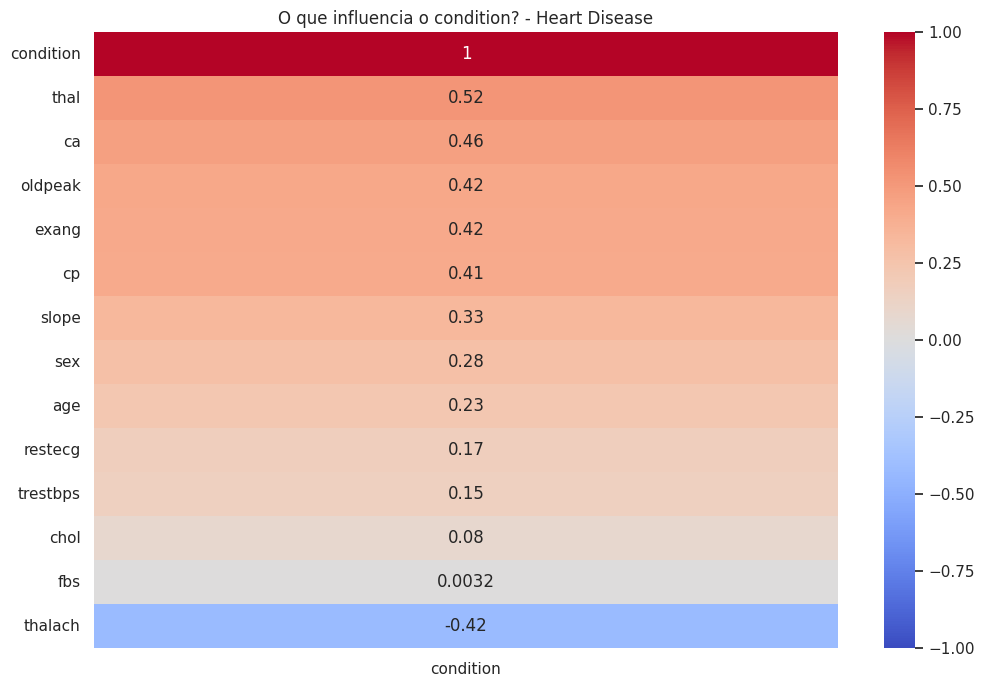

In [4]:
def analise_correlacao(caminho, nome, alvo):
    df = pd.read_csv(caminho)
    
    # Truque para o Loan Prediction (Converter Y/N para 1/0 rapidinho para ver correlação)
    if 'Loan_Status' in df.columns:
        df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
        
    # Truque para o Telco Churn (Converter Yes/No para 1/0)
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Selecionar apenas numéricos para o gráfico não quebrar
    df_num = df.select_dtypes(include=[np.number])
    
    plt.figure(figsize=(12, 8))
    # Calcula correlação com o alvo e ordena
    correlacao = df_num.corr()[[alvo]].sort_values(by=alvo, ascending=False)
    
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"O que influencia o {alvo}? - {nome}")
    plt.show()

# --- RODE PARA OS FINALISTAS ---

# 1. Heart Disease (Eixo A)
analise_correlacao('data/heart-disease-cleveland-uci/heart_cleveland_upload.csv', 
                   'Heart Disease', 'condition')